<a href="https://colab.research.google.com/github/BassantSabra/EDA-project-for-Telecommunication-dataset/blob/main/EDA_project_for_telecommunication_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bassant Ahmed Sabra

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pingouin as pg

# Data Cleaning

In [ ]:
# demand file
# data conection
file_name = "/content/drive/MyDrive/Data for carerha internship/Final Project/Demand.xlsx"
df = pd.read_excel(file_name)

#  data cleaning
df.info()
#  there is no null values
print ("there is no null values  :  ", df.isnull().sum())
df["Demand"]= df["Demand"].replace({"high" : "High" , "normal": "Normal", "Normall":"Normal" })
df["Demand(p/kWh)"]= df["Demand"].replace({"High" : 77.21  , "Normal": 19.46 , "Low" : 6.89 })
df["Demand"].unique()
df["DemandDateTime"]=  pd.to_datetime(df["DemandDateTime"] , format= '%H:%M:%S %d-%m-%y')

# some feature engineering on demanddate col
df["Time"] = df["DemandDateTime"].dt.time
df["Date"] = df["DemandDateTime"].dt.date
df["Hour"] = df["DemandDateTime"].dt.hour
df["year"] = df["DemandDateTime"].dt.year
df['Month'] = pd.to_datetime(df['DemandDateTime'], format='%m').dt.month_name().str.slice(stop=3)
df = df.rename(columns={"DemandDateTime" : "DateTime"})
df1 = df
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB
there is no null values  :   DemandDateTime    0
Demand            0
dtype: int64


<ipython-input-2-0fe19a24b331>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Demand(p/kWh)"]= df["Demand"].replace({"High" : 77.21  , "Normal": 19.46 , "Low" : 6.89 })


,DateTime,Demand,Demand(p/kWh),Time,Date,Hour,year,Month
0,2013-01-01 00:00:00,Normal,19.46,00:00:00,2013-01-01,0,2013,Jan
1,2013-01-01 00:30:00,Normal,19.46,00:30:00,2013-01-01,0,2013,Jan
2,2013-01-01 01:00:00,Normal,19.46,01:00:00,2013-01-01,1,2013,Jan
3,2013-01-01 01:30:00,Normal,19.46,01:30:00,2013-01-01,1,2013,Jan
4,2013-01-01 02:00:00,Normal,19.46,02:00:00,2013-01-01,2,2013,Jan
...,...,...,...,...,...,...,...,...
17515,2013-12-31 21:30:00,Normal,19.46,21:30:00,2013-12-31,21,2013,Dec
17516,2013-12-31 22:00:00,Normal,19.46,22:00:00,2013-12-31,22,2013,Dec
17517,2013-12-31 22:30:00,Normal,19.46,22:30:00,2013-12-31,22,2013,Dec
17518,2013-12-31 23:00:00,Normal,19.46,23:00:00,2013-12-31,23,2013,Dec


In [ ]:
#  data connection
files = glob("/content/drive/MyDrive/Data for carerha internship/Final Project/Sites Energy Consumption Part_00*.csv")
dfs = []
for file in files:
  df = pd.read_csv(file)
  dfs.append(df)

#  data transformation
df = pd.concat(dfs ,  ignore_index= True)
print (" The no of unique cells :", df["cell_id"].nunique())
print (df["site_id"].unique())
print(df["region"].unique())

print("\n")


#  check null values
print ("there is no null values = ",df.isnull().sum())

print("\n")

#  check duplicates values
print ("The no of duplicates before cleaning : ",df.duplicated().sum())
#  drop the duplicates
df = df.drop_duplicates(keep="first")

# date transformation
df["DateTime"]= df["DateTime"].str.replace(",","-")
df["DateTime"]=  pd.to_datetime(df["DateTime"] , format= '%H:%M:%S %y-%d-%m')
df = df.rename(columns = {'KWH/hh (per half hour) ':'Energy_consumed'})

# merging demand and consmption data to make analysis and testing
df = pd.merge(df , df1 , on='DateTime', how='left')
df["total_price(P)"] = (df["Energy_consumed"] * df["Demand(p/kWh)"])

print("the skewness of energy is :", df["Energy_consumed"].skew()) # it is too high


df


 The no of unique cells : 82
['A' 'P' 'E' 'Q' 'H' 'L' 'N' 'K' 'J' 'U' 'D' 'G' 'C' 'F']
['A' 'B' 'C' 'D']


there is no null values =  cell_id                    0
DateTime                   0
KWH/hh (per half hour)     0
site_id                    0
region                     0
dtype: int64


The no of duplicates before cleaning :  942
the skewness of energy is : 1058.4825230856839


,cell_id,DateTime,Energy_consumed,site_id,region,Demand,Demand(p/kWh),Time,Date,Hour,year,Month,total_price(P)
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,19.46,00:00:00,2013-01-01,0,2013,Jan,4.26174
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,19.46,00:30:00,2013-01-01,0,2013,Jan,4.68986
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,19.46,01:00:00,2013-01-01,1,2013,Jan,3.71686
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,19.46,01:30:00,2013-01-01,1,2013,Jan,4.57310
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,19.46,02:00:00,2013-01-01,2,2013,Jan,3.54172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000069,2013-05-12 20:00:00,0.061,G,C,Normal,19.46,20:00:00,2013-05-12,20,2013,May,1.18706
1379306,MAC000069,2013-05-12 20:30:00,0.090,G,C,Normal,19.46,20:30:00,2013-05-12,20,2013,May,1.75140
1379307,MAC000069,2013-05-12 21:00:00,0.069,G,C,Normal,19.46,21:00:00,2013-05-12,21,2013,May,1.34274
1379308,MAC000069,2013-05-12 21:30:00,0.084,G,C,Normal,19.46,21:30:00,2013-05-12,21,2013,May,1.63464


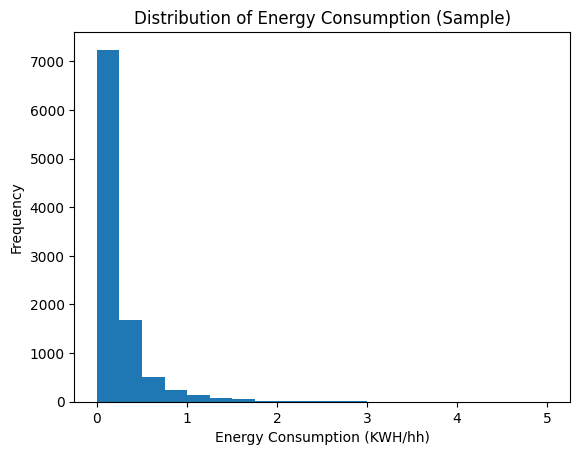

In [ ]:
#  i couldnt to figure energy consumption because of large dataset so i take a sample to draw it
#  it is right skewed

sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)
plt.hist(df_sample['Energy_consumed'], bins=20)
plt.title('Distribution of Energy Consumption (Sample)')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Energy_consumed'>

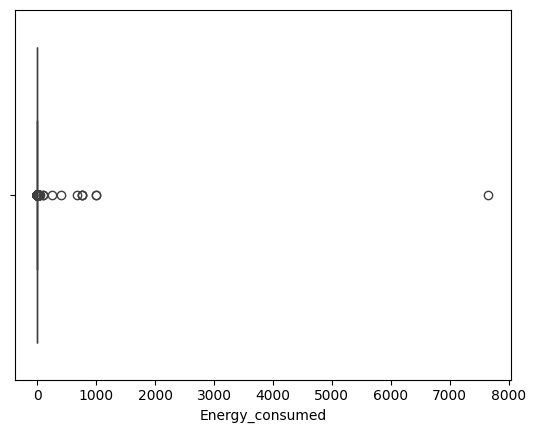

In [ ]:
# large no of outliers values
sns.boxplot(data = df, x = 'Energy_consumed')

In [ ]:
# checking missing record on some cells
x = (df.groupby(df["cell_id"])["Time"].count() / 17520 )* 100
for index , value  in x.items() :
  if value < 95:
    print ( index , value)

"""i will drop cells no MAC000016 , MAC000050 , MAC000080
because i depend on continuous data
which is so important for me to save all records but it is a business logic for me
to impute cell records that have more than 50% of the missing records to analyze it and make testing and there is
no reference records to get the pattern from it! I think those cells need more investigation
I will keep the others

I will keep the other as it is because I didn't know the pattern for each cell from previous records  """

# drop [MAC000016, MAC000050 , MAC000080 ]cells
df = df[~df['cell_id'].isin(["MAC000016", "MAC000050", "MAC000080"])]


MAC000008 82.73401826484019
MAC000016 4.115296803652968
MAC000028 76.43835616438356
MAC000050 29.046803652968034
MAC000063 72.87100456621005
MAC000080 40.54223744292237
MAC000095 74.5148401826484


# Anomaly Detection

In [ ]:
# Anomaly Detection
df.describe()
# univariate AD
print(df["Energy_consumed"].describe())
# min _energy is ( 0 )

len(df[df["Energy_consumed"] == 0] )/ len(df)

# I will keep it because it didn't affect total energy consumption or total costdepend on business prosepective maybe it occurs because of shutdown or zero consumption



# IQR
def AD_IQR(df, col_name):
  q1, q3 = np.quantile(df[col_name], [0.25, 0.75])
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr

  df[f'AD_IQR_' + col_name] = np.where((df[col_name] > upper_limit) | (df[col_name] < lower_limit), 1, 0)
  return df

df = AD_IQR(df , "Energy_consumed")
df[df["AD_IQR_Energy_consumed"] == 1]
print(df['AD_IQR_Energy_consumed'].value_counts())


# MAD
median = np.median(df['Energy_consumed'])
absolute_deviations = np.abs(df['Energy_consumed'] - median)
MAD = np.median(absolute_deviations)
threshold = MAD * 3  # Numberof Standard deviations that could be accepted as threshold

df['AD_MAD_Energy_consumed'] = np.where(df['Energy_consumed'] > threshold, 1, 0)
print(df['AD_MAD_Energy_consumed'].value_counts())


""" based on skewness in the data of energy consumption, I will depend on the Median Absolute Deviation
as q1 and q3 calculations will be affected by high outliers, that is why I will rely on a median in calculations
Also, I didn't know the history of data in the last years to identify the pattern   """

df = df[df["AD_MAD_Energy_consumed"] == 0]
df



count    1.366397e+06
mean     2.424160e-01
std      6.799526e+00
min      0.000000e+00
25%      6.600000e-02
50%      1.360000e-01
75%      2.650000e-01
max      7.657000e+03
Name: Energy_consumed, dtype: float64
AD_IQR_Energy_consumed
0    1247244
1     119153
Name: count, dtype: int64
AD_MAD_Energy_consumed
0    1003793
1     362604
Name: count, dtype: int64


<ipython-input-6-6b553236954f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'AD_IQR_' + col_name] = np.where((df[col_name] > upper_limit) | (df[col_name] < lower_limit), 1, 0)
<ipython-input-6-6b553236954f>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AD_MAD_Energy_consumed'] = np.where(df['Energy_consumed'] > threshold, 1, 0)


,cell_id,DateTime,Energy_consumed,site_id,region,Demand,Demand(p/kWh),Time,Date,Hour,year,Month,total_price(P),AD_IQR_Energy_consumed,AD_MAD_Energy_consumed
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,19.46,00:00:00,2013-01-01,0,2013,Jan,4.26174,0,0
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,19.46,00:30:00,2013-01-01,0,2013,Jan,4.68986,0,0
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,19.46,01:00:00,2013-01-01,1,2013,Jan,3.71686,0,0
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,19.46,01:30:00,2013-01-01,1,2013,Jan,4.57310,0,0
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,19.46,02:00:00,2013-01-01,2,2013,Jan,3.54172,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000069,2013-05-12 20:00:00,0.061,G,C,Normal,19.46,20:00:00,2013-05-12,20,2013,May,1.18706,0,0
1379306,MAC000069,2013-05-12 20:30:00,0.090,G,C,Normal,19.46,20:30:00,2013-05-12,20,2013,May,1.75140,0,0
1379307,MAC000069,2013-05-12 21:00:00,0.069,G,C,Normal,19.46,21:00:00,2013-05-12,21,2013,May,1.34274,0,0
1379308,MAC000069,2013-05-12 21:30:00,0.084,G,C,Normal,19.46,21:30:00,2013-05-12,21,2013,May,1.63464,0,0


# Data analysis and visullization

<Axes: xlabel='total_price(P)'>

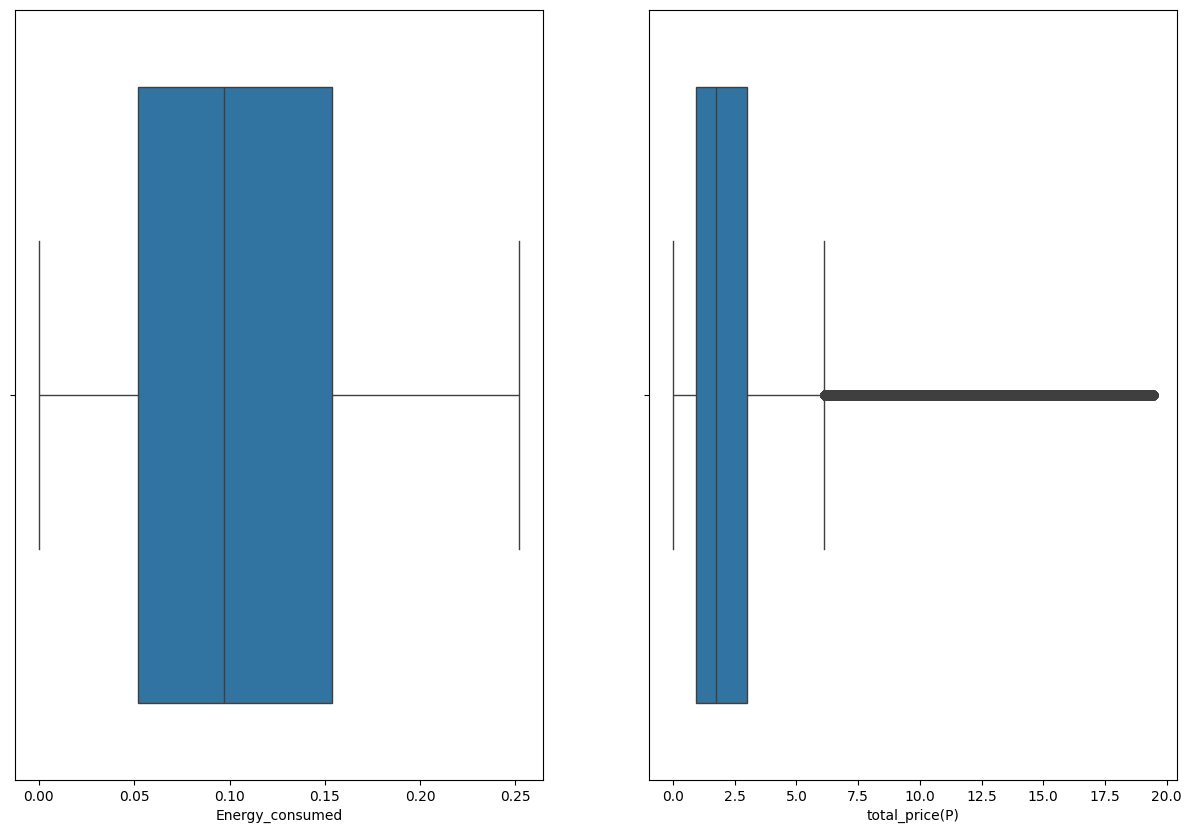

In [ ]:
#  data visualization
fig, axis = plt.subplots(1,2, figsize = (15,10))
sns.boxplot(data = df, x = 'Energy_consumed', ax = axis[0])
sns.boxplot(data = df, x = 'total_price(P)', ax = axis[1])

## The top region is Region A, which has the highest energy consumption

                                         





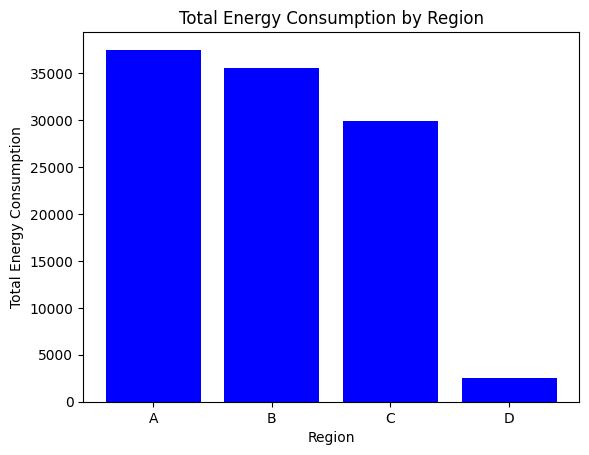

In [ ]:
grouped_data = df.groupby(df['region'])["Energy_consumed"].sum()

# Create bar plot using plt
plt.bar(grouped_data.index, grouped_data.values,color="blue")
plt.title('Total Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=360)
plt.show()

## The top sites are E, H, and Q, which have the highest energy consumption




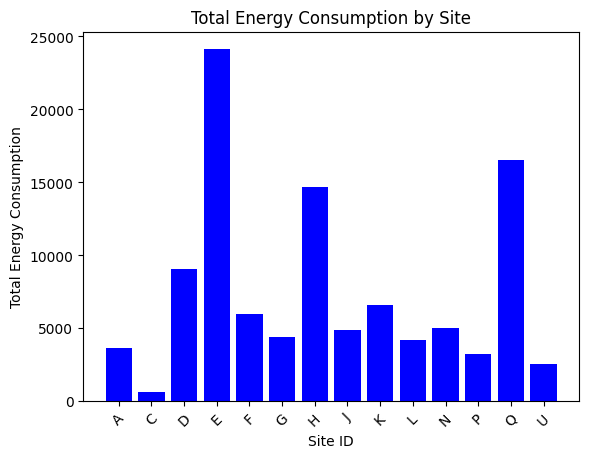

In [ ]:
grouped_data2 = df.groupby(df['site_id'])["Energy_consumed"].sum()
# Create bar plot using plt
plt.bar(grouped_data2.index, grouped_data2.values, color="blue")
plt.title('Total Energy Consumption by Site')
plt.xlabel('Site ID')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45)
plt.show()

## the top 5 cells in energy consumption are 57,62,84,27,66

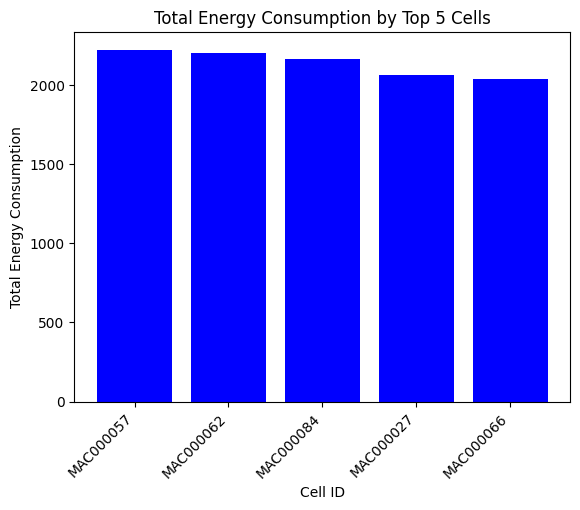

In [ ]:
grouped_data3 = df.groupby(df['cell_id'])["Energy_consumed"].sum().sort_values(ascending=False)
top_5_cells = grouped_data3[:5]  # Select top 5 cells

# Create bar plot using plt
plt.bar(top_5_cells.index, top_5_cells.values, color = "blue")
plt.title('Total Energy Consumption by Top 5 Cells')
plt.xlabel('Cell ID')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45, ha='right')
plt.show()

## Seasonal trend for energy consumption which represents the highest energy consumption peaks


*   MAY
*   JULY







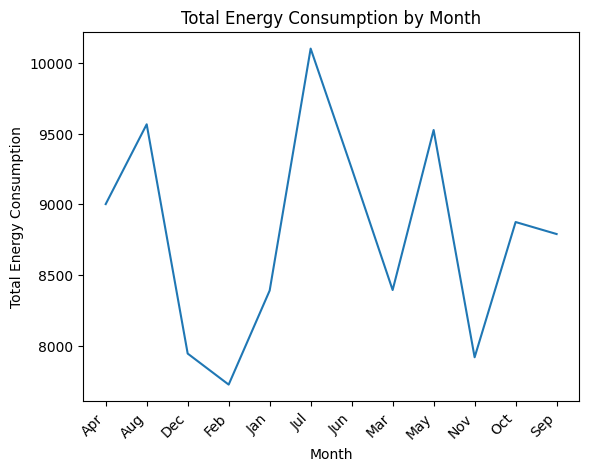

In [ ]:
grouped_data4 = df.groupby('Month')['Energy_consumed'].sum().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_data4['Month'] = pd.Categorical(grouped_data4['Month'], categories=month_order, ordered=True) # it doesnt work !

# Create line plot
plt.plot(grouped_data4['Month'], grouped_data4['Energy_consumed'])
plt.title('Total Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45, ha='right')
plt.show()

## Time analysis which represent the peaks of energy consumption across the daytime






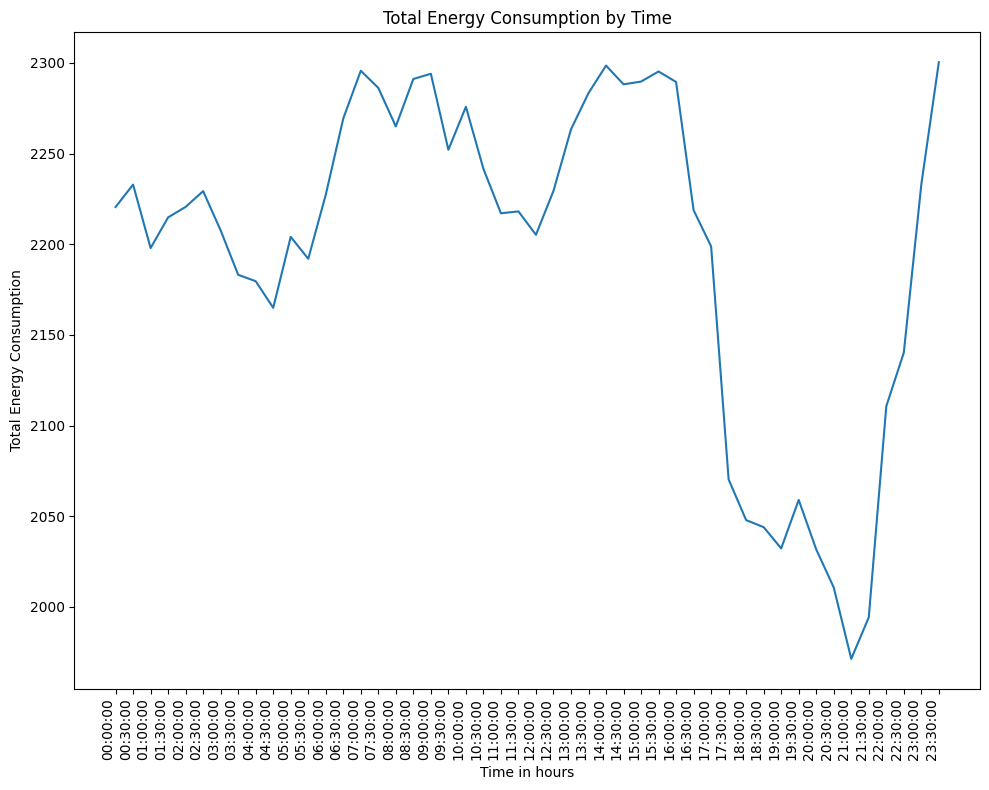

In [ ]:
#  time analysis
df["Time"] = df["Time"].astype("str")
grouped_data5 = df.groupby('Time')['Energy_consumed'].sum().reset_index()

# Create line plot using plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(grouped_data5['Time'], grouped_data5['Energy_consumed'])
plt.title('Total Energy Consumption by Time')
plt.xlabel('Time in hours')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#  Does the region significantly affect energy consumption?


# using ANOVA test to validate my assumption

###   depending on my analysis that approved that avg energy consumption slightly effect by region ..............i assum my h0

*   h0 : region had a very low significant effect on energy consumption

*   ha: region doesnt have a significant  effect



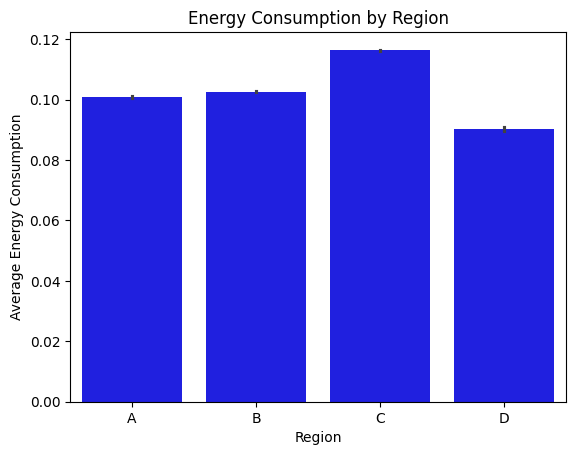

In [ ]:
# the average (mean) energy consumption for each region
sns.barplot(x='region', y='Energy_consumed', data=df, color = "blue") # i need to know error bars and overlabing
plt.title('Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Average Energy Consumption')
plt.show()

## p_value < 0.05 which mean that i have to reject null !

In [ ]:
# Apply ANOVA Test
pg.anova(data = df , dv = 'Energy_consumed', between = 'region')

,Source,ddof1,ddof2,F,p-unc,np2
0,region,3,1003789,3554.720984,0.0,0.010512


In [ ]:
pg.pairwise_tests(
    data = df,
    dv = 'Energy_consumed',
    between = 'region',
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,region,A,B,False,True,-11.650510,716867.303992,two-sided,2.295820e-31,7.879e+26,-0.027384
1,region,A,C,False,True,-89.449370,588509.212397,two-sided,0.000000e+00,inf,-0.224896
2,region,A,D,False,True,33.782214,37991.992823,two-sided,1.628513e-246,1.874e+245,0.149573
3,region,B,C,False,True,-81.764235,549980.245365,two-sided,0.000000e+00,inf,-0.213213
4,region,B,D,False,True,40.209496,36306.924118,two-sided,0.000000e+00,inf,0.198118
5,region,C,D,False,True,82.503583,39701.068238,two-sided,0.000000e+00,inf,0.413175


# Is there a relationship between the time of day and energy consumption?


## based on my analysis there is a very very week correlation between time of day and energy


*   h0 : there is a correlation depend on my below analysis
*   h1 : there is no correlation



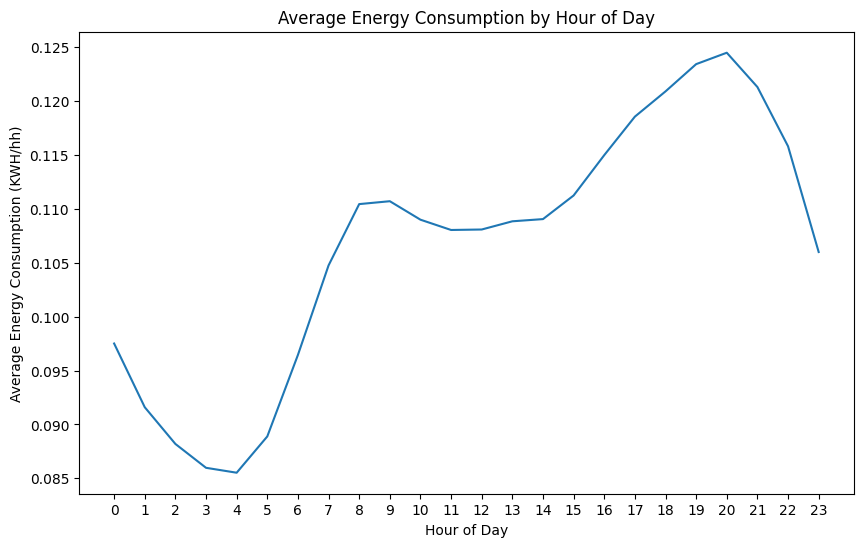

In [ ]:
hourly_consumption = df.groupby('Hour')['Energy_consumed'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Energy_consumed', data=hourly_consumption)
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (KWH/hh)')
plt.xticks(range(24))  # Set x-axis ticks to represent hours
plt.show()


In [ ]:
correlation = df['Hour'].corr(df['Energy_consumed'])
print(f"Correlation between Hour and Energy Consumption: {correlation}")

Correlation between Hour and Energy Consumption: 0.14982022995007607


## # p_value < 0.05 which mean that i have to reject null !

In [1]:
pg.anova(data = df , dv = 'Energy_consumed', between = 'Hour')

NameError: name 'pg' is not defined

# Assuming that we can shutdown few cells were the consumption is low, what is the threshold that you would recommend and how much KW and EGP it would save accordingly?


## in the below histogram for aglance i can see a significant deceline starting around 0.10 KWh/hh so i will try .08 , 0.1 , 0.12 and get the best threshold

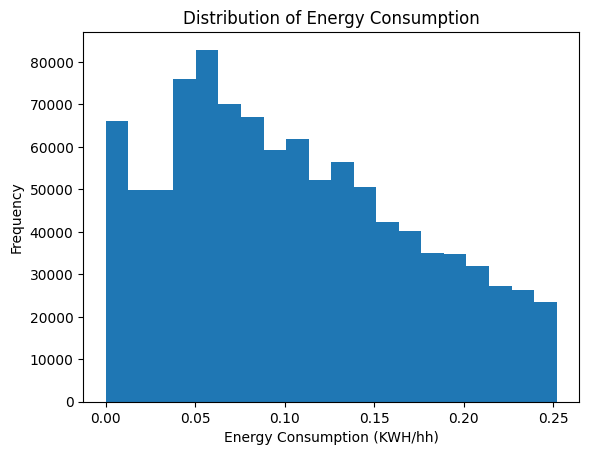

In [ ]:
plt.hist(df['Energy_consumed'], bins=20)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (KWH/hh)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# threshold = 0.1 (10th percentile)

# Filter data for cells below the threshold
low_consumption_cells = df[df['Energy_consumed'] < df['Energy_consumed'].quantile(0.10)]

# Calculate total energy consumption of low-consumption cells
total_energy_saved_KW = low_consumption_cells['Energy_consumed'].sum()

# Calculate total cost savings (P)
total_cost_saved_P = low_consumption_cells['total_price(P)'].sum()

print(f"Potential Energy Savings (KW): {total_energy_saved_KW}")
print(f"Potential Cost Savings (P): {total_cost_saved_P}")

Potential Energy Savings (KW): 684.6570000000002
Potential Cost Savings (P): 13914.63


In [ ]:
# threshold = 0.12 (12 th percentile)

# Filter data for cells below the threshold
low_consumption_cells = df[df['Energy_consumed'] < df['Energy_consumed'].quantile(0.12)]

# Calculate total energy consumption of low-consumption cells
total_energy_saved_KW = low_consumption_cells['Energy_consumed'].sum()

# Calculate total cost savings (P)
total_cost_saved_P = low_consumption_cells['total_price(P)'].sum()

print(f"Potential Energy Savings (KW): {total_energy_saved_KW}")
print(f"Potential Cost Savings (P): {total_cost_saved_P}")

Potential Energy Savings (KW): 1160.5410000000002
Potential Cost Savings (P): 23630.758830000002


In [ ]:
# threshold = 0.08

# Filter data for cells below the threshold
low_consumption_cells = df[df['Energy_consumed'] < df['Energy_consumed'].quantile(0.08)]

# Calculate total energy consumption of low-consumption cells
total_energy_saved_KW = low_consumption_cells['Energy_consumed'].sum()

# Calculate total cost savings (P)
total_cost_saved_P = low_consumption_cells['total_price(P)'].sum()

print(f"Potential Energy Savings (KW): {total_energy_saved_KW}")
print(f"Potential Cost Savings (P): {total_cost_saved_P}")


Potential Energy Savings (KW): 324.49500000000006
Potential Cost Savings (P): 6607.1618100000005


# so the best choice is the 12% threshold depending on energy consumption and cost saving